# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
# Your code here. 
age = [17,51,27,21,36,48,19,26,54,30]
tardies = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({"Age":age,"Tardies":tardies})
student_data.index.name = "StudentID"
student_data.index = np.arange(1,11)
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

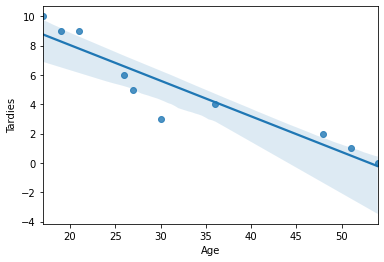

In [3]:
# Your code here.
sns.regplot(data=student_data,x="Age",y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# The older the people become, the less tardies observed. Negative correlation between those two.
'''
Tardies = a + b*(Age)
'''

'\nTardies = a + b*(Age)\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.

In [6]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [7]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [8]:
# We see negative strong correlation (strength) in table 1 and negative outcome in covariance table 
# which makes sense in this case. Since this is a negative correlation between two variables we
# were expecting covariance value to be negative instead of any + number since it shows only direction.

In [9]:
X = student_data["Age"]
Y = student_data["Tardies"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print("Slope: ",slope)
print("Intercept: ",intercept)
print("r_value: ",r_value)
print("p_value: ",p_value)
print("std_err: ",std_err)

'''
Tardies = 12.88 + ((-.24)*(Age))
'''

Slope:  -0.24282077091598084
Intercept:  12.88880336313577
r_value:  -0.9391626886887123
p_value:  5.566653834553361e-05
std_err:  0.03139728816158602


'\nTardies = 12.88 + ((-.24)*(Age))\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
'''
Multiple linear regression is represented as :

y = b0 + b1X1 + b2X2 + b3X3 +…..+ bnXn

but we can also, represent it as: y = b0X0 + b1X1 + b2X2 + b3X3 +…..+ bnXn where X0 = 1

We have to add one column with all the same values as 1 to represent b0X0.

Why we need to do that?? 

statsmodels Python library provides an OLS(ordinary least square)
class for implementing Backward Elimination. Now one thing to note that OLS class does not 
provide the intercept by default and it has to be created by the user himself. 

That is why we created a column with all same values as 1 to represent b0X0.
Thats the reason why we get different R2 values in sklearn Regression model and Ols statsmodel.
'''

'\nMultiple linear regression is represented as :\n\ny = b0 + b1X1 + b2X2 + b3X3 +…..+ bnXn\n\nbut we can also, represent it as: y = b0X0 + b1X1 + b2X2 + b3X3 +…..+ bnXn where X0 = 1\n\nWe have to add one column with all the same values as 1 to represent b0X0.\n\nWhy we need to do that?? \n\nstatsmodels Python library provides an OLS(ordinary least square)\nclass for implementing Backward Elimination. Now one thing to note that OLS class does not \nprovide the intercept by default and it has to be created by the user himself. \n\nThat is why we created a column with all same values as 1 to represent b0X0.\nThats the reason why we get different R2 values in sklearn Regression model and Ols statsmodel.\n'

In [11]:
# Your response here.

# We will use lienar regresiion model for this data. The outcome variable will be Y axis which is
# student's tardies.
X = student_data["Age"]
Y = student_data["Tardies"]

X = sm.add_constant(X) # here adding the above explanation - i guess this time it will work.

model = sm.OLS(Y,X)
results = model.fit() 
predictions = results.predict(X)

compare = pd.DataFrame({'Actual':Y, 'Prediction':predictions})
compare

,Actual,Prediction
1,10,8.760850
2,1,0.504944
3,5,6.332643
4,9,7.789567
5,4,4.147256
6,2,1.233406
7,9,8.275209
8,6,6.575463
9,0,-0.223518
10,3,5.604180


In [12]:
# looking above predicted values,  some values are really close but better to check R-square

In [13]:
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.8820265558250109


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Predictions'>

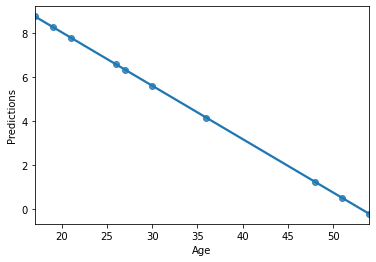

In [14]:
# Your code here.
student_data["Predictions"] = predictions
sns.regplot(data=student_data,x="Age",y="Predictions")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
print('The r-squared score of our model is:', r2_score(Y, predictions))
# Knowing that 1 is perfect score for R-square, with the score of 8.88 we can say that age is a 
# good predictor on prediction of tardiness.

The r-squared score of our model is: 0.8820265558250109


In [16]:
# Double check with OLS table - indeed R-square is calculated correct.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           5.57e-05
Time:                        22:03:07   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need 

In [18]:
# Import the data
vehicles = pd.read_csv("../data/vehicles.csv",sep=",")
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


In [19]:
# Checking data types
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
# Your response here. 
vehicles_ml = vehicles[["CO2 Emission Grams/Mile","Year","Cylinders","Fuel Barrels/Year",
                        "Combined MPG","Fuel Cost/Year"]]
vehicles_ml.corr()

# Fuel Barrels/Year looks like the strongest correlation with CO2 emission so can be a good predictor.
# Fuel Cost/Year and Combined MPG are also have strong correlation with Co2 emission (one positive and
# one negative strong correlation.)

# I'd say Year is not a good predictor in this case since corr strength is only 0.22

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [21]:
# checking data types
vehicles_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CO2 Emission Grams/Mile  35952 non-null  float64
 1   Year                     35952 non-null  int64  
 2   Cylinders                35952 non-null  float64
 3   Fuel Barrels/Year        35952 non-null  float64
 4   Combined MPG             35952 non-null  int64  
 5   Fuel Cost/Year           35952 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Your response here. 
# Here, I think I have to exclude Year but will take a look to it afterwards..

X = vehicles_ml[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
Y = vehicles_ml["CO2 Emission Grams/Mile"]

X = sm.add_constant(X) # adding constant for OLS

model = sm.OLS(Y,X)
results = model.fit() 
predictions = results.predict(X)

compare = pd.DataFrame({'Actual':Y, 'Prediction':predictions})
compare

,Actual,Prediction
0,522.764706,522.030384
1,683.615385,671.001053
2,555.437500,552.684951
3,683.615385,670.680436
4,555.437500,570.340582
...,...,...
35947,244.000000,230.654658
35948,243.000000,230.334041
35949,244.000000,230.013424
35950,246.000000,229.692808


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [23]:
# Your response here. 
print('The r-squared score of our model is:', r2_score(Y, predictions))

The r-squared score of our model is: 0.9808734920269122


In [24]:
# Double check with OLS table - indeed R-square is calculated correct.
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                             22:03:07   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### I will try to solve same problem by using sklearn library (which i believe would be handy in the future)

In [25]:
'''
Solving above problem by using sklearn library
'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

X = vehicles_ml[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
Y = vehicles_ml[["CO2 Emission Grams/Mile"]]


X_normalized = scaling.fit_transform(X)
Y_normalized = scaling.fit_transform(Y)

regression_model = LinearRegression().fit(X_normalized,Y_normalized)
predictions = regression_model.predict(X_normalized)

actual = [Y_normalized for Y_normalized in Y_normalized for Y_normalized in Y_normalized]
predicted =  [predictions for predictions in predictions for predictions in predictions]


compare = pd.DataFrame({'Actual':actual,'Prediction':predicted})
compare

# results look pretty good

,Actual,Prediction
0,0.394107,0.393511
1,0.524607,0.514373
2,0.420615,0.418381
3,0.524607,0.514113
4,0.420615,0.432706
...,...,...
35947,0.167942,0.157114
35948,0.167130,0.156854
35949,0.167942,0.156594
35950,0.169564,0.156334


In [26]:
print('The r-squared score of our model is:', r2_score(Y_normalized, predictions))
# Same performance as OLS method.

The r-squared score of our model is: 0.9808734920269122


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
# Your code here. 
X_values = [1,3,4,6,8,9,11,14]
Y_values = [1,2,4,4,5,7,8,13]

data = pd.DataFrame({"X":X_values,"Y":Y_values})
data.style.hide_index()

X,Y
1,1
3,2
4,4
6,4
8,5
9,7
11,8
14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Text(0, 0.5, 'Number of people - Attended')

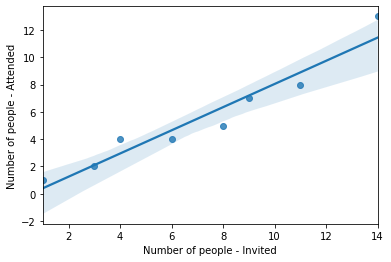

In [28]:
# Your code here.
sns.regplot(data=data,x="X",y="Y")
plt.xlabel("Number of people - Invited")
plt.ylabel("Number of people - Attended")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [29]:
data["X"].corr(data["Y"])
# They are highly correlated.

0.9652303546573691

In [30]:
# Your response here. 

# Looks like there is a linear regression between those two variables, the more people are invited
# the more people show up, however the research question above is hard to interpret by only looking
# this graph.

X = data["X"]
Y = data["Y"]

X = sm.add_constant(X) # adding constant manually

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# Well, they have a strong correlation, also adjusted r-square is 0.92 which is a very good score,
# and I also don't see any outliers or weird points in the dataset, but still 13 attendees/14 invited
# is quite huge proportion compared to other cases so I'll exclude this data.

# But if question didn't ask it to me, I'd probably move forward with what I have since I didn't see
# any weirdness in the distribution. What I am missing here in this case..?

c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           0.000102
Time:                        22:03:07   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [31]:
# Your response here. 

X = data["X"][:-1]
Y = data["Y"][:-1]

X = sm.add_constant(X) # adding constant manually

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

c:\users\gorkem\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           0.000264
Time:                        22:03:07   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [32]:
# Your response here. 


# Well by removing the last point, our r-square value is increased from 0.920 to 0.932 which is 
# a good result. However, unless we have a good explanation, I assume we shouldn't exclude
# such outliers in real life scnearios?